In [65]:
import numpy as np
import pandas as pd
import optuna
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.ensemble import RandomForestRegressor, VotingRegressor , RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [53]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [11]:
import seaborn as sns

<Axes: xlabel='성공확률', ylabel='Count'>

/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/

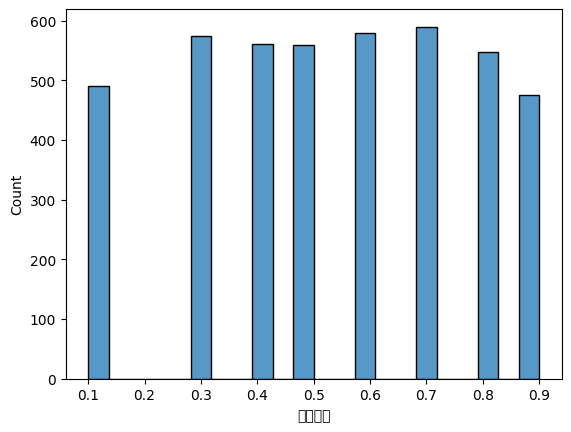

In [63]:
sns.histplot(train["성공확률"])

In [ ]:
train["성공확률"].unique()

array([0.3, 0.8, 0.5, 0.7, 0.1, 0.6, 0.4, 0.9])

# 성공 확률 자체값 => .1 .3 .4 .5 .6 .7 .8 .9 만 존재 확률 예측

In [ ]:
train.head(5)

,설립연도,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률
0,2009,CT005,이커머스,Series A,4126.0,No,No,56.0,3365.0,4764.0,4.71,NaN,0.3
1,2023,CT006,핀테크,Seed,4167.0,Yes,No,80.0,4069.0,279.0,1.00,2500-3500,0.8
2,2018,CT007,기술,Series A,3132.0,Yes,Yes,54.0,6453.0,12141.0,4.00,3500-4500,0.5
3,2016,CT006,NaN,Seed,3245.0,Yes,Yes,NaN,665.0,10547.0,2.97,NaN,0.7
4,2020,CT002,에듀테크,Seed,1969.0,No,Yes,94.0,829.0,9810.0,1.00,1500-2500,0.1


# 결측값 및 이상치 확인

In [ ]:
(train.isna()).sum()

설립연도                 0
국가                   0
분야                 857
투자단계                 0
직원 수               174
인수여부                 0
상장여부                 0
고객수(백만명)          1320
총 투자금(억원)            0
연매출(억원)              0
SNS 팔로워 수(백만명)       0
기업가치(백억원)         1220
성공확률                 0
dtype: int64

### 분야 : 857 : 19.58% object type
### 직원 수 : 174 : 3.9% 사실상 0이나 다른 object로 대체가능
### 고객수 : 1320 : 30.16% 결측값 대치 필수 = float tyep 
### 기업가치 : 1220 : 27.87% 결측값 대치 필수 = object type
## 전체수 : 4376

In [ ]:
train["분야"].unique()

array(['이커머스', '핀테크', '기술', nan, '에듀테크', '게임', '헬스케어', '물류', '푸드테크', 'AI',
       '에너지'], dtype=object)

In [ ]:
train["기업가치(백억원)"].unique()

array([nan, '2500-3500', '3500-4500', '1500-2500', '4500-6000', '6000이상'],
      dtype=object)

In [ ]:
train['고객수(백만명)'].describe()

count    3056.000000
mean       49.214332
std        27.141242
min         1.000000
25%        27.000000
50%        49.000000
75%        72.000000
max        99.000000
Name: 고객수(백만명), dtype: float64

<Axes: xlabel='고객수(백만명)', ylabel='Count'>

/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packa

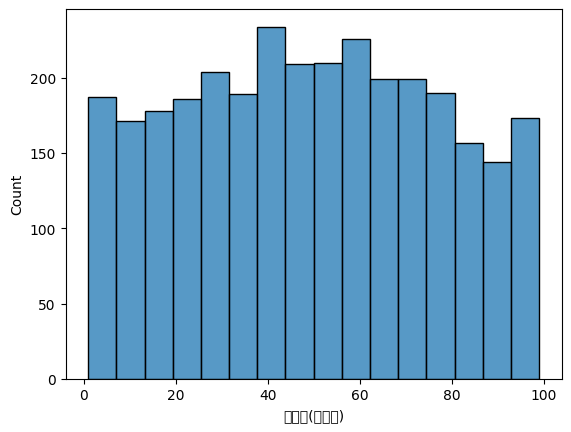

In [ ]:
sns.histplot(train['고객수(백만명)'])

# feature별로 encoding

### category => 최빈값을 활용해서 결측값 대치
### numeric => 중앙값을 활용해서 결측값 대치

In [56]:
# 결측값 처리
categorical_cols = ['분야', '기업가치(백억원)']
for col in categorical_cols:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(test[col].mode()[0])

numerical_cols = ['직원 수', '고객수(백만명)']
for col in numerical_cols:
    train[col] = train[col].fillna(train[col].median())
    test[col] = test[col].fillna(test[col].median())

# 범주형 인코딩
categorical_features = ['국가', '분야', '투자단계', '인수여부', '상장여부', '기업가치(백억원)']
for feature in categorical_features:
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature].astype(str))
    test[feature] = le.transform(test[feature].astype(str))

In [ ]:
# 데이터 분리
X_train = train.drop(columns=['ID','성공확률'], axis=1)
y_train = train['성공확률']

In [44]:
# random forest regressor

def objective_rf(trial):
    model = RandomForestRegressor(
        n_estimators=500,  # 고정
        max_depth=trial.suggest_int('max_depth', 3, 20),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 4),
        max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        random_state=42,
        n_jobs=-1
    )
    return cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1).mean()

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=30)

rf_model = RandomForestRegressor(**study_rf.best_params, n_estimators=500, random_state=42, n_jobs=-1)

[I 2025-05-07 10:18:39,673] A new study created in memory with name: no-name-e6b854aa-4ed6-46f8-b2ea-11452dbe6a55
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command.py", line 111, in send
    sock.sendall(("Content-Length: %s\r\n\r\n" % len(as_bytes)).encode("ascii"))
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_daemon_thread.py", line 53, in run
    self._on_run()
  File "/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 432, in _on_run
    self.py_db.

In [50]:
def objective_cb(trial):
    model = CatBoostRegressor(
        n_estimators=500,
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),
        max_depth=trial.suggest_int('max_depth', 3, 16),
        subsample=trial.suggest_float('subsample', 0.5, 1.0),
        rsm=trial.suggest_float('rsm', 0.5, 1.0),
        l2_leaf_reg=trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        random_state=42,
        verbose=0
    )
    return cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1).mean()

study_cb = optuna.create_study(direction='maximize')
study_cb.optimize(objective_cb,n_trials=30)

cb_model = CatBoostRegressor(**study_cb.best_params,n_estimators=500,random_state=42)

[I 2025-05-07 10:27:05,454] A new study created in memory with name: no-name-b5c863ee-2d16-4d5e-9706-6750441afbbf
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command.py", line 111, in send
    sock.sendall(("Content-Length: %s\r\n\r\n" % len(as_bytes)).encode("ascii"))
  File "/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/de

In [71]:
y_train[y_train>0.5] = 1
y_train[y_train<=0.5] = 0

/var/folders/2j/531dm15d4sx4nrn8x29_h2q00000gn/T/ipykernel_41824/1311258211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[y_train>0.5] = 1
/var/folders/2j/531dm15d4sx4nrn8x29_h2q00000gn/T/ipykernel_41824/1311258211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[y_train<=0.5] = 0


In [74]:
y_train.value_counts()

성공확률
1.0    2192
0.0    2184
Name: count, dtype: int64

In [75]:
def objective_rfc(trial):
    model = RandomForestClassifier(
        n_estimators=500,
        max_depth=trial.suggest_int('max_depth', 3, 20),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 4),
        max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        random_state=42,
        n_jobs=-1
    )
    # 분류기이므로 f1-score로 변경
    return cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1).mean()

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rfc, n_trials=30)

# 최적 모델 학습
rfc_model = RandomForestClassifier(
    **study_rf.best_params,
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

[I 2025-05-07 11:37:29,848] A new study created in memory with name: no-name-646eab6b-519a-41a3-9e43-9066ca73cd25
[I 2025-05-07 11:37:35,402] Trial 0 finished with value: 0.5159857064248441 and parameters: {'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.5159857064248441.
[I 2025-05-07 11:37:39,841] Trial 1 finished with value: 0.5122429028542691 and parameters: {'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 0.5159857064248441.
[I 2025-05-07 11:37:42,357] Trial 2 finished with value: 0.5316055468221809 and parameters: {'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 2 with value: 0.5316055468221809.
[I 2025-05-07 11:37:44,331] Trial 3 finished with value: 0.5102655276413479 and parameters: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 2 with

In [76]:
# 모델 학습 통해서 값 계산 => cat , rf, lightGBM 을 사용해서 fitting 해보기

## Soft Voting with RF:XGB = 7:3
#voting_model = VotingRegressor(estimators=[
#    ('rf', rf_model),
#    ('cb', cb_model)
#], weights=[7, 3])  # RF:XGB = 7:3

# 학습 및 예측
rfc_model.fit(X_train, y_train)



RandomForestClassifier(max_depth=18, max_features=None, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [79]:
rfc_test_preds = rfc_model.predict_proba(test.drop(columns=['ID'],axis=1))

submission_voting = pd.DataFrame({'ID': test['ID'], '성공확률': rfc_test_preds[:,1]})
submission_voting.to_csv('rfc_model.csv', index=False)


In [85]:
submission_voting

,ID,성공확률
0,TEST_0000,0.472965
1,TEST_0001,0.443784
2,TEST_0002,0.415676
3,TEST_0003,0.470333
4,TEST_0004,0.663122
...,...,...
1750,TEST_1750,0.483258
1751,TEST_1751,0.559911
1752,TEST_1752,0.557973
1753,TEST_1753,0.419684


<Axes: ylabel='Count'>

/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/

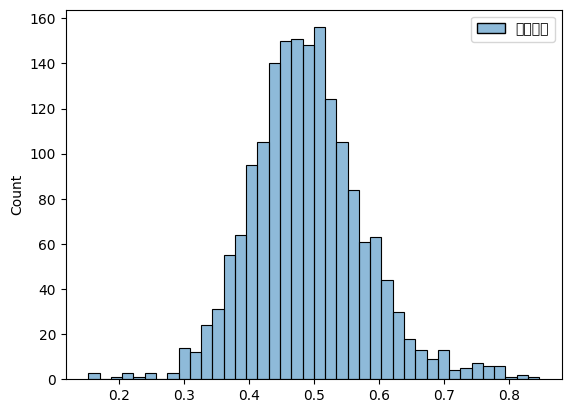

In [83]:
sns.histplot(submission_voting)

In [60]:
# 모델 학습 통해서 값 계산 => cat , rf, lightGBM 을 사용해서 fitting 해보기

## Soft Voting with RF:XGB = 7:3
#voting_model = VotingRegressor(estimators=[
#    ('rf', rf_model),
#    ('cb', cb_model)
#], weights=[7, 3])  # RF:XGB = 7:3

# 학습 및 예측
rf_model.fit(X_train, y_train)

rf_test_preds = rf_model.predict(test.drop(columns=['ID'],axis=1))

submission_voting = pd.DataFrame({'ID': test['ID'], '성공확률': rf_test_preds})
submission_voting.to_csv('rf_model.csv', index=False)

In [58]:
submission_voting

,ID,성공확률
0,TEST_0000,0.510443
1,TEST_0001,0.495313
2,TEST_0002,0.490592
3,TEST_0003,0.530862
4,TEST_0004,0.635550
...,...,...
1750,TEST_1750,0.516291
1751,TEST_1751,0.588006
1752,TEST_1752,0.542829
1753,TEST_1753,0.481655


<Axes: ylabel='Count'>

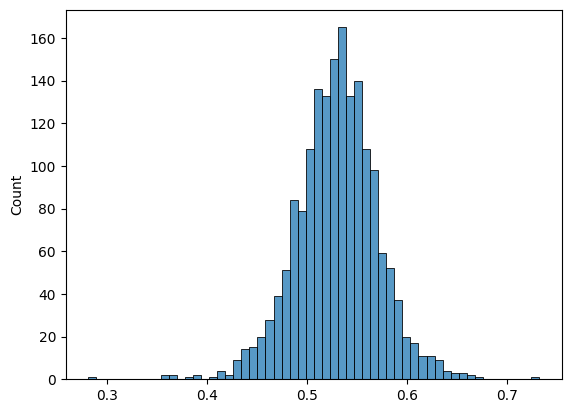

In [64]:
sns.histplot(rf_test_preds)

In [ ]:
train

In [61]:
# 학습 및 예측
cb_model.fit(X_train, y_train)
cb_test_preds = cb_model.predict(test.drop(columns=['ID']))

submission_voting = pd.DataFrame({'ID': test['ID'], '성공확률': cb_test_preds})
submission_voting.to_csv('cb_model.csv', index=False)

0:	learn: 0.2414312	total: 30.3ms	remaining: 15.1s
1:	learn: 0.2411311	total: 56.7ms	remaining: 14.1s
2:	learn: 0.2409046	total: 73.8ms	remaining: 12.2s
3:	learn: 0.2408921	total: 74.4ms	remaining: 9.22s
4:	learn: 0.2406107	total: 90.2ms	remaining: 8.93s
5:	learn: 0.2403436	total: 108ms	remaining: 8.9s
6:	learn: 0.2400591	total: 126ms	remaining: 8.87s
7:	learn: 0.2397683	total: 144ms	remaining: 8.82s
8:	learn: 0.2394641	total: 163ms	remaining: 8.9s
9:	learn: 0.2391801	total: 174ms	remaining: 8.51s
10:	learn: 0.2389371	total: 190ms	remaining: 8.46s
11:	learn: 0.2386134	total: 207ms	remaining: 8.42s
12:	learn: 0.2383594	total: 224ms	remaining: 8.38s
13:	learn: 0.2380736	total: 239ms	remaining: 8.3s
14:	learn: 0.2377948	total: 257ms	remaining: 8.32s
15:	learn: 0.2375541	total: 280ms	remaining: 8.48s
16:	learn: 0.2372612	total: 301ms	remaining: 8.56s
17:	learn: 0.2370310	total: 320ms	remaining: 8.58s
18:	learn: 0.2367026	total: 337ms	remaining: 8.52s
19:	learn: 0.2364056	total: 355ms	remai

<Axes: ylabel='Count'>

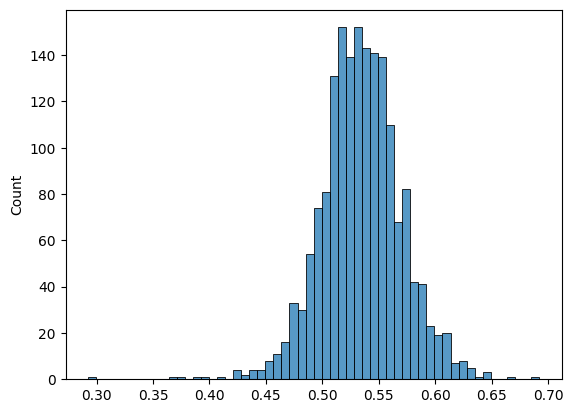

In [84]:
sns.histplot(cb_test_preds)

In [86]:
new_df = pd.read_csv("rf_model.csv")

In [87]:
submission_voting["성공확률"] = (submission_voting["성공확률"] + new_df["성공확률"])/2

In [89]:
submission_voting.to_csv("ensemble_rf_rfc.csv",index=False)

<Axes: ylabel='Count'>

/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/dacon/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/

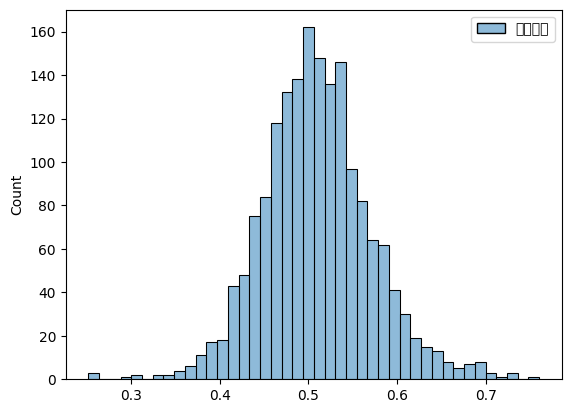

In [88]:
sns.histplot(submission_voting)